In [13]:
import numpy as np
import pandas as pd
import io
from bokeh.plotting import figure, save,output_file
from bokeh.layouts import widgetbox, row, column, layout
from bokeh.models import ColumnDataSource, Select, Slider,HoverTool,LogColorMapper
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import GMapPlot,Circle, GMapOptions,DataRange1d
from bokeh.io import output_notebook, show, curdoc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


In [14]:
fpath = 'export_dashboard_cost_2016_06_15_12_24_55.xlsx'
df = pd.read_excel(fpath, sheetname='Country List')
df.head()

,Country,Keyword Repetitions,Latitude,Longitude
0,United States,1663,28.53834,-81.37924
1,United Kingdom,621,53.95800,-1.08300
2,Canada,84,43.70011,-79.41630
3,Jersey,22,49.18804,-2.10491
4,India,21,13.08784,80.27847


In [15]:
lat=df['Latitude'].values
lon=df['Longitude'].values
Keyword_Repetitions=df['Keyword Repetitions']
Country=df['Country']


/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


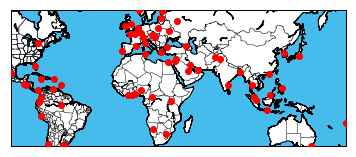

In [20]:
# determine range to print based on min, max lat and lon of the data
margin=2
lat_min=min(lat)
lat_max=max(lat)
lon_min=min(lon)
lon_max=max(lon)

# create map using BASEMAP
m=Basemap(llcrnrlon=lon_min,llcrnrlat=lat_min,urcrnrlon=lon_max,urcrnrlat=lat_max,lat_0=(lat_max - lat_min)/2,lon_0=(lon_max-lon_min)/2,
            projection='merc',resolution = 'h',area_thresh=10000.,)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons,lats=m(lon, lat)
# plot points as red dots
m.scatter(lons,lats,color='red',zorder=5)
plt.show()

/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/zj/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


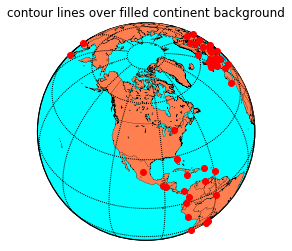

In [19]:
map=Basemap(projection='ortho',lat_0=45,lon_0=-100,resolution='l')
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='coral',lake_color='aqua')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='aqua')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))

# compute native map projection coordinates of lat/lon grid.
lons,lats=map(lon,lat)
map.scatter(lons, lats,color='r',zorder=5)
plt.title('contour lines over filled continent background')
plt.show()

In [ ]:
source=ColumnDataSource(data=dict(points=points,x=Longitude,y=Latitude,Coun=Country,Keyword_Repetitions=Keyword_Repetitions))
tools="pan,wheel_zoom,reset,save"
palette=palette
color_mapper = LogColorMapper(palette=palette)
p=figure(title="Twitter Geolocalization Interactive Plot",tools=tools,
    x_axis_location=None, y_axis_location=None)
p.grid.grid_line_color = None
p.circle('x', 'y',source=source,size=3,color="red")

In [ ]:
county_xs = [county["lons"] for county in counties.values()]？？？
county_ys = [county["lats"] for county in counties.values()]??

# p.patches('x', 'y',source=source,fill_color={'field':'Country','transform':color_mapper},
#           fill_alpha=10, line_color="white", line_width=1)

In [77]:
my_hover = HoverTool()
my_hover.tooltips = [("Address of the point", "@x,@y")]
p.add_tools(my_hover)
# curdoc().add_root(p)
show(p)

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: Place [renderer: GlyphRenderer(id='7102a655-aead-4330-8d45-aef2a8e6291b', ...)]
